In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install tensorflow


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
df = pd.read_csv('Infosysstockpricedata.csv') 
df.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,0.794921,0.796679,0.791015,0.796679,0.549483,204800.0
1,1996-01-02,0.794921,0.798828,0.793457,0.793457,0.547260,204800.0
2,1996-01-03,0.798828,0.798828,0.798828,0.798828,0.550965,102400.0
3,1996-01-04,0.791015,0.794921,0.791015,0.793554,0.547327,307200.0
4,1996-01-05,0.784179,0.784179,0.784179,0.784179,0.540861,51200.0
5,1996-01-08,0.784179,0.791015,0.785156,0.789062,0.544229,358400.0
6,1996-01-09,0.789062,0.781250,0.771484,0.780273,0.538167,870400.0
7,1996-01-10,0.780273,0.775390,0.771484,0.773437,0.533452,358400.0
8,1996-01-11,0.779296,0.791015,0.773437,0.791015,0.545576,819200.0
9,1996-01-12,0.787109,0.787109,0.781250,0.786621,0.542545,358400.0


In [8]:
#preprocess the data
data = df.filter(['Close']).values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [9]:
#spliiting the dataset into training dataset 
train_data_len = int(len(data) * 0.8)
train_data = scaled_data[:train_data_len, :]
test_data = scaled_data[train_data_len:, :]

In [10]:
#Prepare the training data
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))  

In [11]:
#building lstm model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [12]:
# training the lstm model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
5140/5140 [==============================] - 76s 14ms/step - loss: nan
Epoch 2/10
5140/5140 [==============================] - 75s 15ms/step - loss: nan
Epoch 3/10
5140/5140 [==============================] - 74s 14ms/step - loss: nan
Epoch 4/10
5140/5140 [==============================] - 81s 16ms/step - loss: nan
Epoch 5/10
5140/5140 [==============================] - 74s 14ms/step - loss: nan
Epoch 6/10
5140/5140 [==============================] - 73s 14ms/step - loss: nan
Epoch 7/10
5140/5140 [==============================] - 75s 15ms/step - loss: nan
Epoch 8/10
5140/5140 [==============================] - 79s 15ms/step - loss: nan
Epoch 9/10
5140/5140 [==============================] - 77s 15ms/step - loss: nan
Epoch 10/10
5140/5140 [==============================] - 74s 14ms/step - loss: nan


In [27]:
# testing the lstm model
x_test = []
y_test = data[train_data_len + 60:, :]
for i in range(len(test_data) - 60):
    x_test.append(test_data[i:i + 60, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [28]:
# Predicting the model 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

39/39 [==============================] - 0s 10ms/step


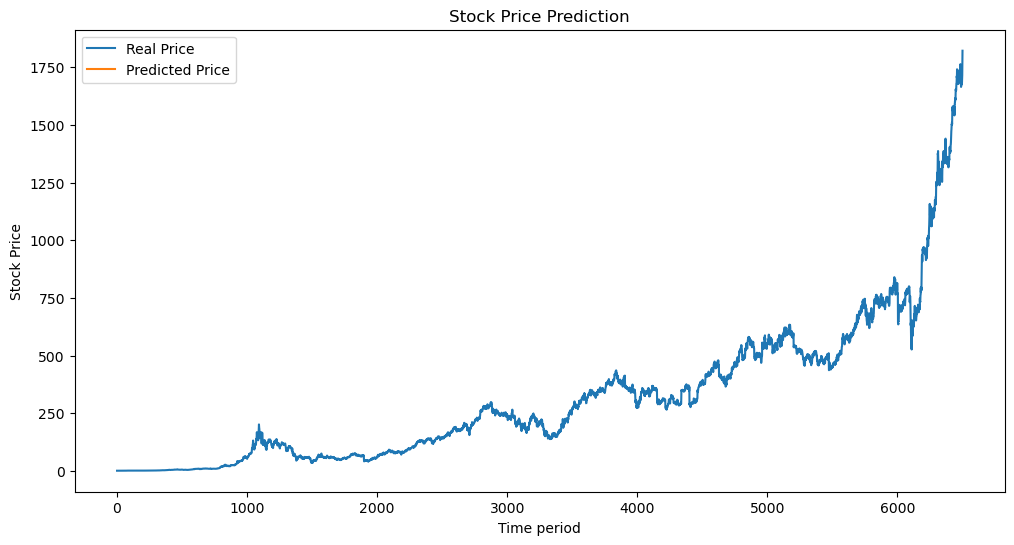

In [26]:
# Plot the predicted and actual prices of infoysys stock 
plt.figure(figsize=(12, 6))
plt.plot(df['Close'].values, label='Real Price')
plt.plot(range(train_data_len + 60, len(data)), predictions, label='Predicted Price')
plt.xlabel('Time period')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()
